## FASHION_MNIST DATASET

In [1]:
#IMPORTING LIBRARIES:

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%load_ext tensorboard

In [2]:
#LOADING THE DATA OF FASHION_MNIST

(X_train_full , y_train_full) , (X_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

# X_valid - first 5000 data for validation and rest 55000 for training - scaled down between 0 to 1 by / with 255 (as data ranges between 0 to 255)
# y_valid - first 5000 data for validation and rest 55000 for training -  not scaled down cause its the actual output

X_valid,X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))

55000
10000
5000


## MNIST DATASET:

In [4]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [6]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [7]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
print(f"data type of y_train_full: {y_train_full.dtype},\nshape of y_train_full: {y_train_full.shape}")

data type of y_train_full: uint8,
shape of y_train_full: (60000,)


In [11]:
y_test.shape

(10000,)

In [12]:
# Creating a Validation dataset from X_train_full and y_train_full datasets
# X_train_full  ->  X_valid and X_train
# y_train_full  ->  y_valid and y_train
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range

X_valid,X_train  = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
# We Wont scale down the y_valid,train and test as it is theOutput Variable:

<Axes: >

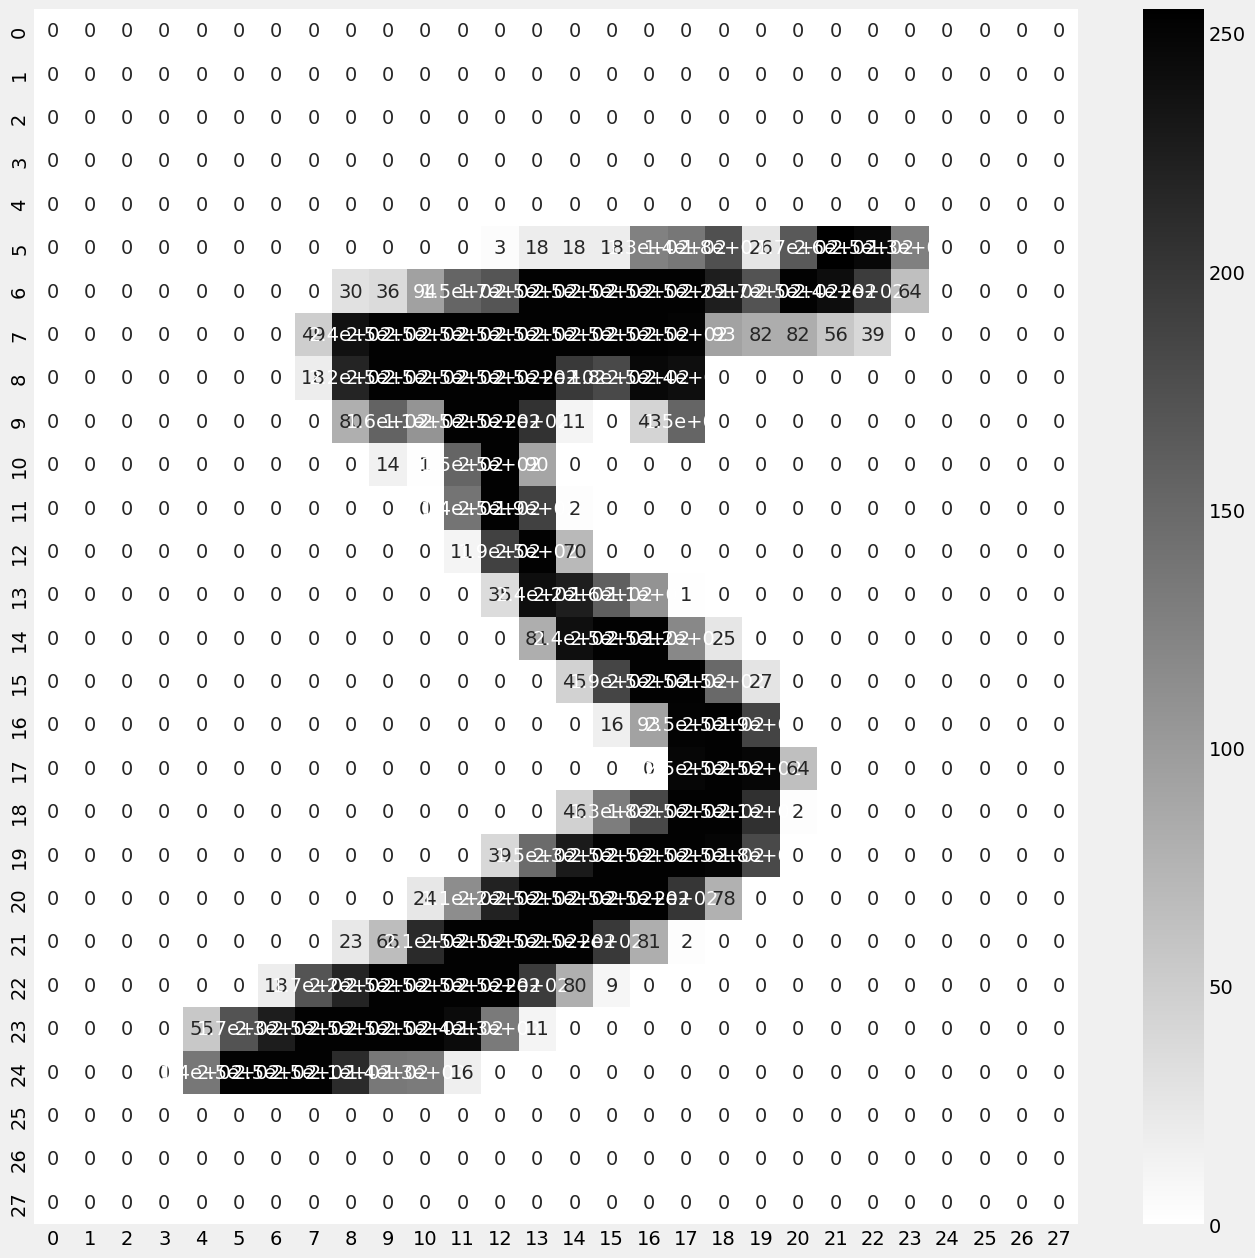

In [13]:
# PLOT OF AN IMAGE THAT IS NOT SCALED DOWN:

plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[0],annot=True,cmap="binary")

<Axes: >

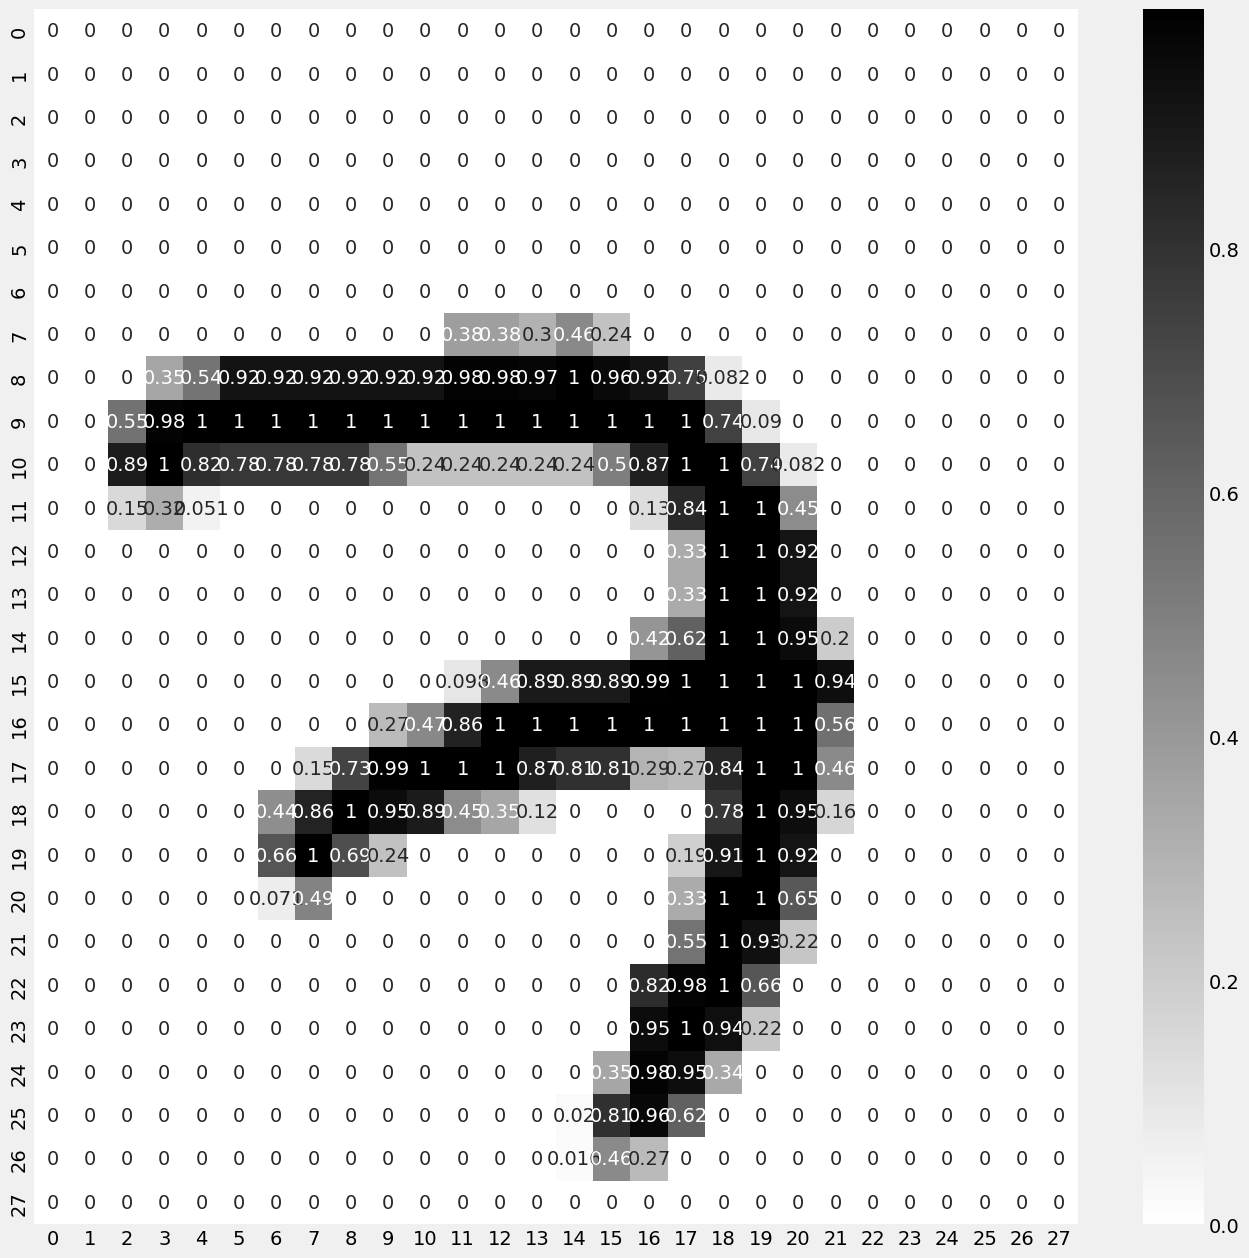

In [14]:
# PLOT OF AN IMAGE THAT IS  SCALED DOWN:

plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [15]:
# CREATING LAYERS OF ANN:

In [ ]:
from keras.layers.rnn.simple_rnn import regularizers
# METHOD-1
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28],name="input_layer")
    tf.keras.layers.Dense(300,activation="relu",kernel_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer=regularizers.L1(1e-3)),
    tf.keras.layers.Droput(0.2),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]


In [19]:
# METHOD-2
from tensorflow.keras import regularizers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
model.add(Flatten(input_shape=[28,28],name="input_layer"))
model.add(Dense(units=64,activation="relu",kernel_regularizer=regularizers.L2(1e-4)))
model.add(Dropout(0.2))
# CHANCES OF DROPPING OUT 20% NEURONS
model.add(Dense(units=32,activation="relu",kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
model.add(Dropout(0.1))
# CHANCES OF DROPPING OUT 10% NEURONS
model.add(Dense(10, activation="softmax", name="outputLayer"))




In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 outputLayer (Dense)         (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [21]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    # FOR MULTICLASS CLASSIFICATION PROBLEM
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
    # STOCHATIC GRADIENT DESCENT
    metrics=["accuracy"]
)

In [24]:
# TRAINING THE MODEL:

import time

start = time.time()

history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),verbose=2,batch_size=32)

end = time.time()

print(f"Runtime for the given model is : {end-start}")

Epoch 1/20
1719/1719 - 5s - loss: 0.4039 - accuracy: 0.8867 - val_loss: 0.2741 - val_accuracy: 0.9288 - 5s/epoch - 3ms/step
Epoch 2/20
1719/1719 - 5s - loss: 0.4019 - accuracy: 0.8862 - val_loss: 0.2704 - val_accuracy: 0.9314 - 5s/epoch - 3ms/step
Epoch 3/20
1719/1719 - 5s - loss: 0.3941 - accuracy: 0.8894 - val_loss: 0.2667 - val_accuracy: 0.9304 - 5s/epoch - 3ms/step
Epoch 4/20
1719/1719 - 5s - loss: 0.3885 - accuracy: 0.8918 - val_loss: 0.2628 - val_accuracy: 0.9312 - 5s/epoch - 3ms/step
Epoch 5/20
1719/1719 - 5s - loss: 0.3833 - accuracy: 0.8935 - val_loss: 0.2597 - val_accuracy: 0.9322 - 5s/epoch - 3ms/step
Epoch 6/20
1719/1719 - 5s - loss: 0.3766 - accuracy: 0.8959 - val_loss: 0.2560 - val_accuracy: 0.9342 - 5s/epoch - 3ms/step
Epoch 7/20
1719/1719 - 5s - loss: 0.3753 - accuracy: 0.8961 - val_loss: 0.2531 - val_accuracy: 0.9342 - 5s/epoch - 3ms/step
Epoch 8/20
1719/1719 - 5s - loss: 0.3705 - accuracy: 0.8961 - val_loss: 0.2499 - val_accuracy: 0.9362 - 5s/epoch - 3ms/step
Epoch 9/

In [25]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.403948,0.886673,0.274052,0.9288
1,0.401919,0.886218,0.270411,0.9314
2,0.394112,0.889436,0.266681,0.9304
3,0.388525,0.891836,0.262833,0.9312
4,0.383335,0.893455,0.259746,0.9322
5,0.376599,0.895891,0.256012,0.9342
6,0.375327,0.896055,0.253124,0.9342
7,0.370530,0.896145,0.249857,0.9362
8,0.361654,0.899382,0.246712,0.9362
9,0.362240,0.899655,0.244406,0.9374


<Axes: >

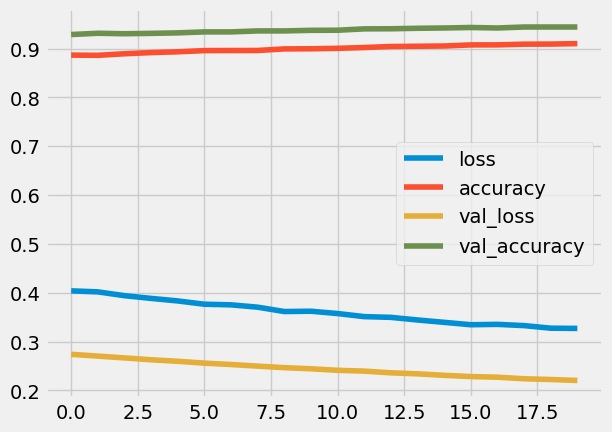

In [26]:
pd.DataFrame(history.history).plot()